In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import pymysql
from money_mng_py import MoneyManager

d:\Web_school_mng\money_mng_py.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("CALL sp_fee_summary_by_period()", conn)


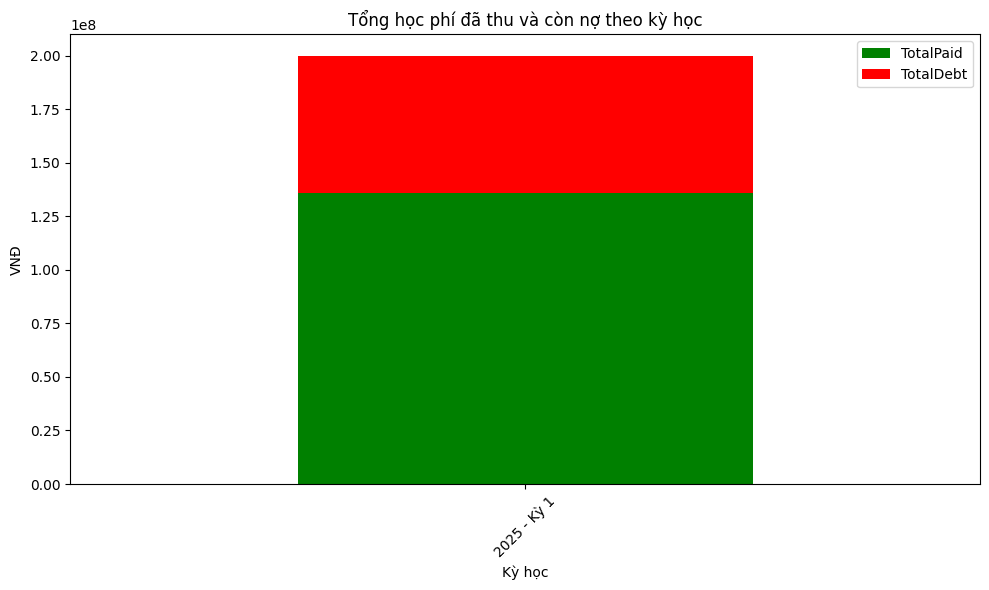

In [5]:
df = MoneyManager.get_fee_summary_by_period()
df['TermYear'] = df['Year'].astype(str) + ' - Kỳ ' + df['Term'].astype(str)

# Vẽ stacked bar chart
df_plot = df[['TermYear', 'TotalPaid', 'TotalDebt']].set_index('TermYear')
df_plot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])

plt.title("Tổng học phí đã thu và còn nợ theo kỳ học")
plt.xlabel("Kỳ học")
plt.ylabel("VNĐ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

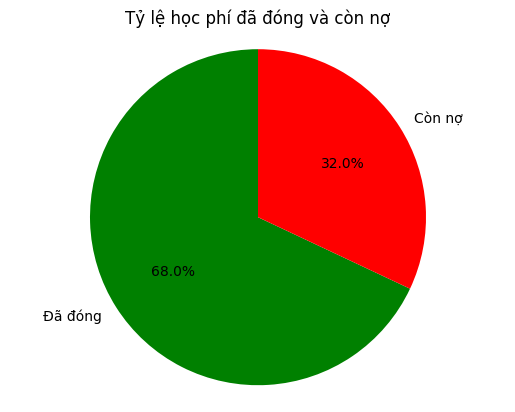

In [6]:
# Tỷ lệ học phí đã đóng với còn nợ
total_paid = df['TotalPaid'].sum()
total_debt = df['TotalDebt'].sum()

plt.pie(
    [total_paid, total_debt],
    labels=['Đã đóng', 'Còn nợ'],
    autopct='%1.1f%%',
    colors=['green', 'red'],
    startangle=90
)
plt.title("Tỷ lệ học phí đã đóng và còn nợ")
plt.axis('equal')
plt.show()

d:\Web_school_mng\money_mng_py.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


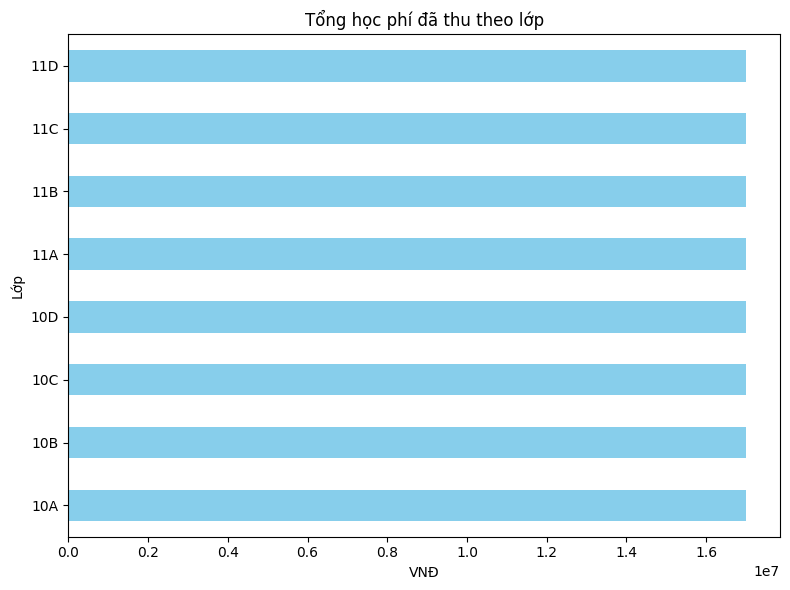

In [7]:
#Tỷ lệ học lí đã thu theo từng lớp
#vì nhập data cho 1 lớp thoi nên nó lỏ

df = MoneyManager.get_fee_by_class_term_year(1, 2025)

class_summary = df.groupby('ClassName')['FeePaid'].sum().sort_values()

class_summary.plot(kind='barh', color='skyblue', figsize=(8, 6))
plt.title("Tổng học phí đã thu theo lớp")
plt.xlabel("VNĐ")
plt.ylabel("Lớp")
plt.tight_layout()
plt.show()

d:\Web_school_mng\money_mng_py.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


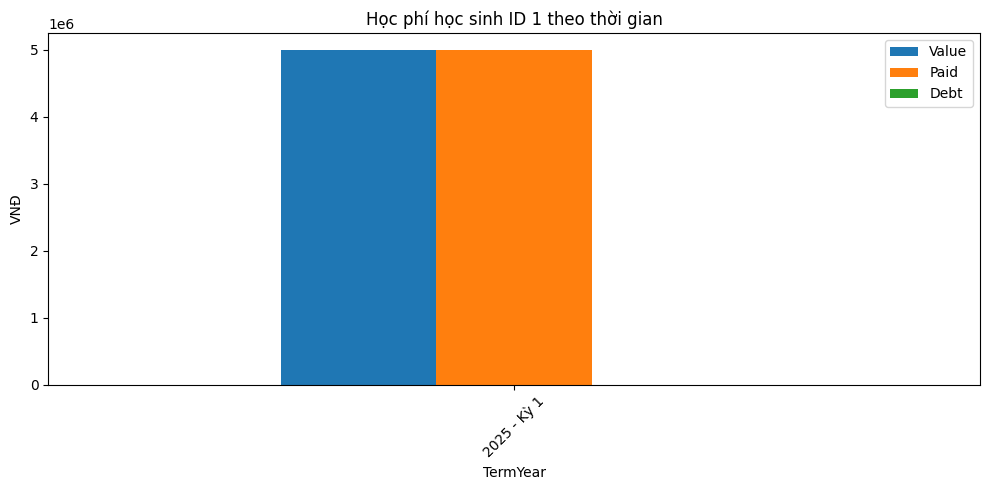

In [8]:
#Học phí của học sinh theo thời gian 

student_id = 1  # thay ID học sinh tùy ý
df = MoneyManager.get_fee_detail_by_student(student_id)
df['TermYear'] = df['Year'].astype(str) + ' - Kỳ ' + df['Term'].astype(str)

df.set_index('TermYear')[['Value', 'Paid', 'Debt']].plot(kind='bar', figsize=(10, 5))
plt.title(f"Học phí học sinh ID {student_id} theo thời gian")
plt.ylabel("VNĐ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

d:\Web_school_mng\money_mng_py.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


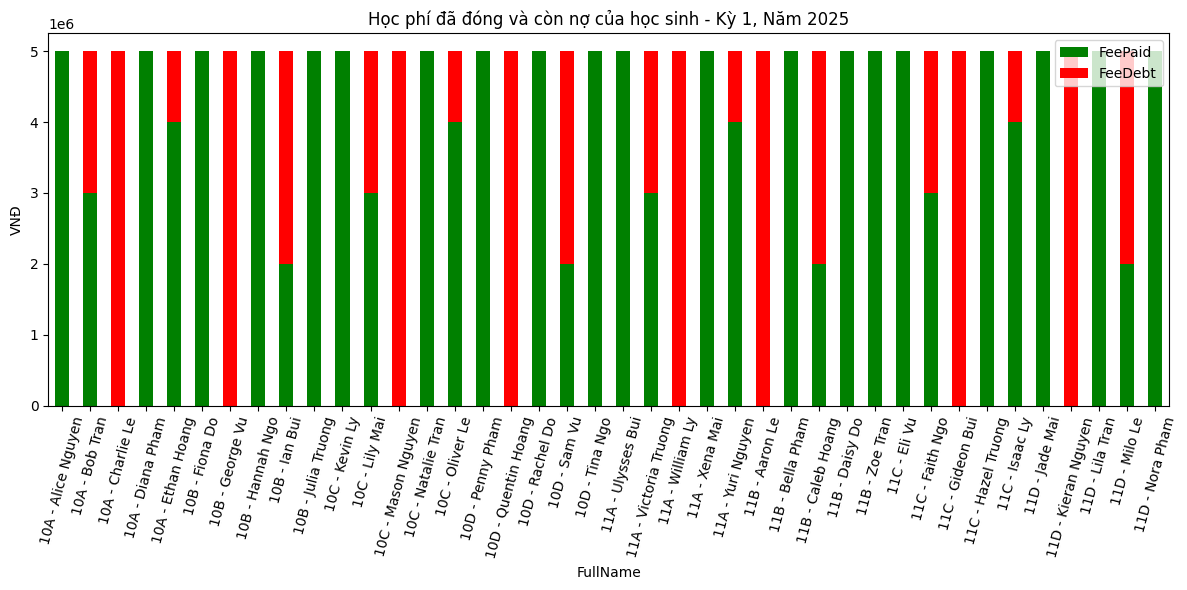

In [9]:
#Biểu đồ cột: học phí từng học sinh trong lớp
import matplotlib.pyplot as plt

term = 1
year = 2025
df = MoneyManager.get_fee_by_class_term_year(term, year)

# Gộp FeePaid và FeeDebt theo học sinh
df['FullName'] = df['ClassName'] + ' - ' + df['StudentName']
df_plot = df[['FullName', 'FeePaid', 'FeeDebt']].set_index('FullName')

df_plot.plot(kind='bar', stacked=True, figsize=(12, 6), color=['green', 'red'])
plt.title(f"Học phí đã đóng và còn nợ của học sinh - Kỳ {term}, Năm {year}")
plt.ylabel("VNĐ")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

d:\Web_school_mng\money_mng_py.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


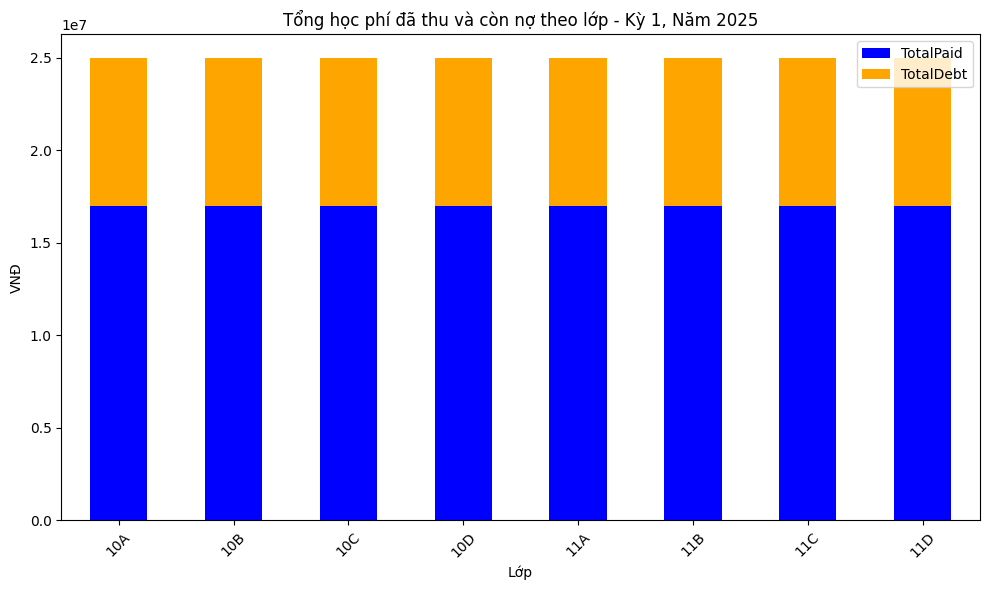

In [10]:
#So sánh tổng học phí giữa các lớp
df_class = MoneyManager.get_fee_total_by_class(term, year)

df_class_plot = df_class[['ClassName', 'TotalPaid', 'TotalDebt']].set_index('ClassName')
df_class_plot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])

plt.title(f"Tổng học phí đã thu và còn nợ theo lớp - Kỳ {term}, Năm {year}")
plt.ylabel("VNĐ")
plt.xlabel("Lớp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
